# **Homework 2**
---

In [1]:
# Import reading tools for the csv file
import pandas as pd                                   # Used for importing data sets
import numpy as np                                    # Importing numpy tools
import matplotlib.pyplot as plt                       # Creating scatter plots       
from scipy import stats                               # Creating statistic symbols and equations
from tqdm import tqdm                                 # Showing a progress bar to visualize how far a program has loaded

from sklearn.cluster import KMeans                    # Arranging collected data points into clusters from a set and quantifying them into their own visuals

from yellowbrick.cluster import SilhouetteVisualizer  # Tools to organize and print silhouette graphs from imported datasets  

import time                                           # Allowing the use of time variables as x-values on a data set graph

## **Example for Kmeans**
---

In [2]:
X = np.array([[1, 2], [1, 4], [1, 0],
              [10, 2], [10, 4], [10, 0]])            # Create an array defined as 'X'
kmeans = KMeans(n_clusters=6, random_state=0).fit(X) # Organize the array into 6
kmeans.labels_                                       # Display labels for Kmeans when necessary

kmeans.predict([[0, 0], [12, 3]])

kmeans.cluster_centers_

array([[10.,  4.],
       [ 1.,  0.],
       [10.,  0.],
       [ 1.,  4.],
       [ 1.,  2.],
       [10.,  2.]])

### ***Read in MNIST Data***
---
If the data is to be not only readable but organizable, it must first be imported as an array. An array is a list that can contain various characters such as strings, integers, and symbols. Data in an array form makes it easier for visualization tools to display the data in a coherent and sequential format

---

In [3]:
mnist_training = np.array(pd.read_csv('~/Files/Data/mnist_train.csv')              # Import all elements of mnist_training as an array

In [4]:
mnist_training                                                                     # Display the data

array([[5, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [4, 0, 0, ..., 0, 0, 0],
       ...,
       [5, 0, 0, ..., 0, 0, 0],
       [2, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [5]:
mnist_testing = np.array(pd.read_csv("~/Files/Data/mnist_test.csv")               # Import all elements of mnist_training as an array

In [6]:
mnist_testing                                                                     # Display the data

array([[7, 0, 0, ..., 0, 0, 0],
       [2, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [7, 0, 0, ..., 0, 0, 0],
       [3, 0, 0, ..., 0, 0, 0],
       [4, 0, 0, ..., 0, 0, 0]])

---

In [8]:
var = []                                  # Define an open list to store the data
num_clusters = 14                         # Set the max amount of clusters for visualization

for i in tqdm(range(2, 14)):              # Organize the minimum and maximum amount of clusters into a range 
    model = KMeans(n_clusters = int(i))   # Render the cluster range readable for the Kmeans package
    model.fit(mnist_training)             # Organize the dataset into a graphical structure
    var.append(model.inertia_)            # Add each cluster to the the variance list 

100%|██████████| 12/12 [00:16<00:00,  1.34s/it]


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


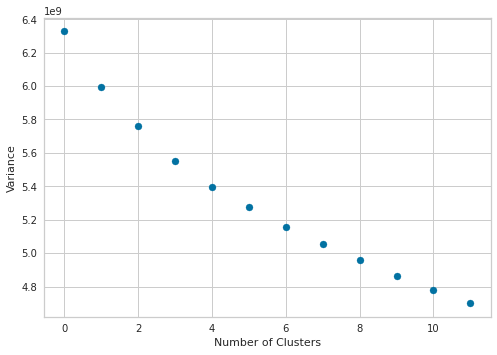

In [9]:
x_cluster_axis = np.arange(num_clusters-2) # Define the amount of clusters depicted along the x-axis but subtract 2 
plt.xlabel("Number of Clusters")
plt.ylabel("Variance")
plt.scatter(x_cluster_axis, var)           # x-axis = clusters; y-axis = proportionate data which the clusters are extracted from
plt.show()                                 # Display the final result

In [10]:
var2 = []                               # Define an open list to store the data
i = 1
num_clusters2 = 10                      # Set the max amount of clusters for visualization 
for i in tqdm(range(2,10)):             # Organize the minimum and maximum amount of clusters 
    model = KMeans(n_clusters = int(i)) # Render the cluster range readable for the KMeans package
    model.fit(mnist_testing)            # Organize the dataset into a graphical structure
    var2.append(model.inertia_)         # Add each cluster to the variance field
    
    i += 1

100%|██████████| 8/8 [00:00<00:00, 40.73it/s]


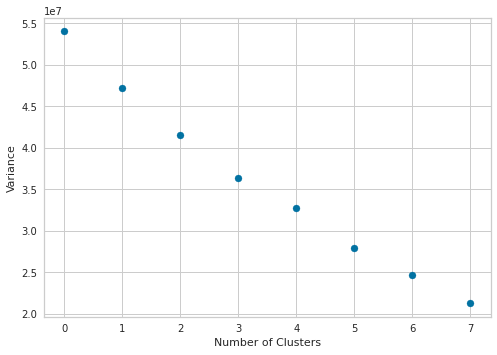

In [11]:
x_cluster_axis2 = np.arange(num_clusters2-2) # Define the amount of clusters depicted along the x-axis but subtract 2 
plt.xlabel("Number of Clusters")
plt.ylabel("Variance")
plt.scatter(x_cluster_axis2, var2)           # x-axis = clusters; y-axis = proportionate data which the clusters are extracted from
plt.show()                                   # Display the final result

### ***Silhouette Graphing***
---

Silhouette graphs are used to measure how many clusters fit into a single set of data as well as how close or how distant each cluster is from one another. Analysis of both fields becomes necessary when programmers want a way to evaluate just how much information information a machine is taking in to learn and process. The final evaluation score comes in the form of the average silhouette score which depicts how accurate the clusters are for when the machine processes information.

---

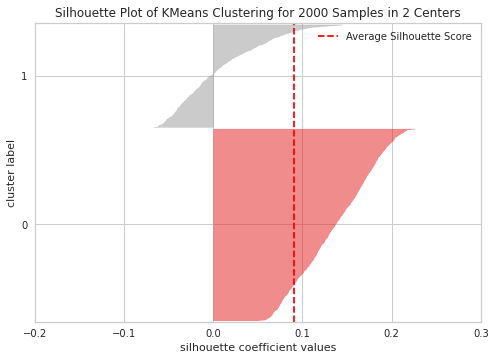

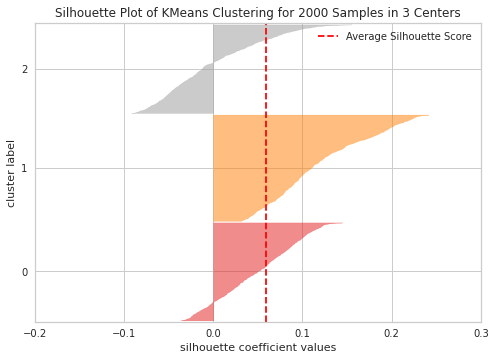

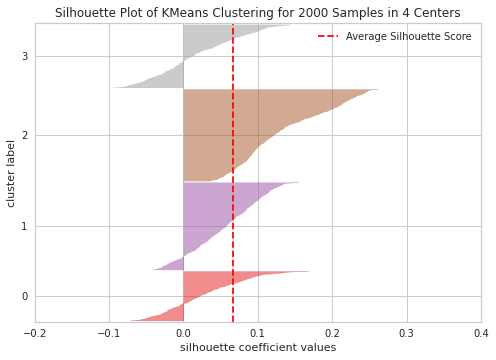

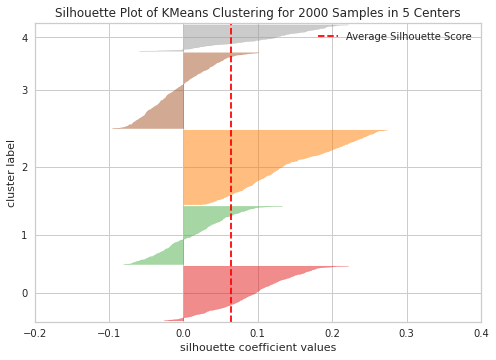

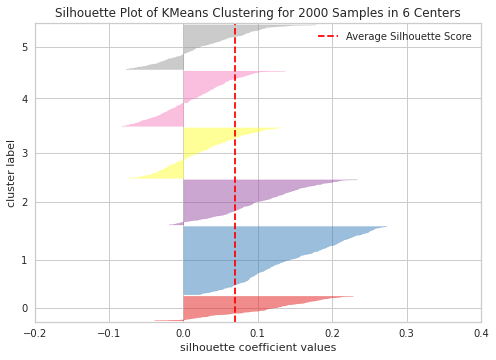

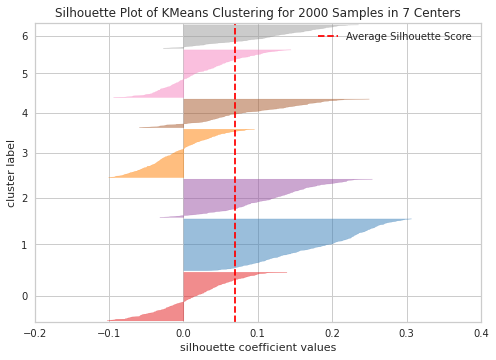

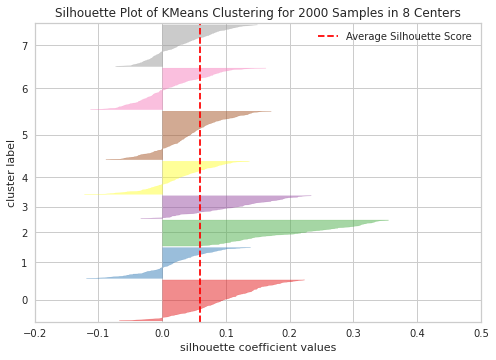

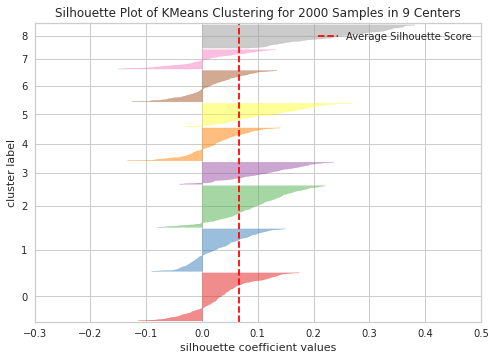

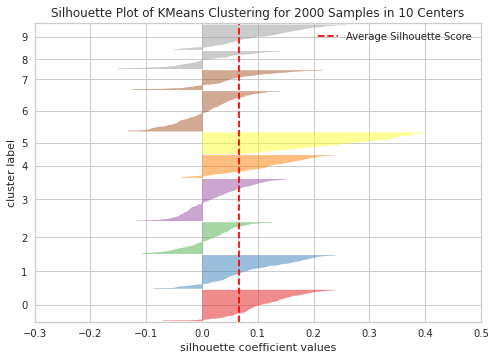

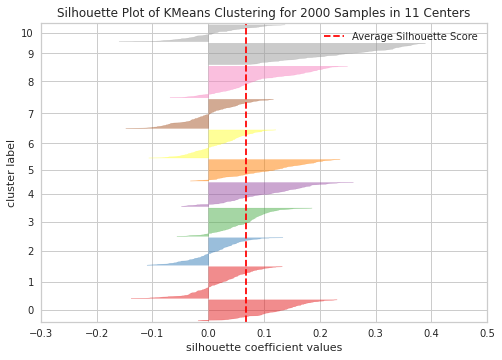

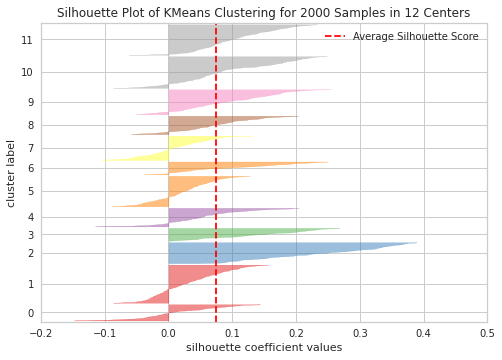

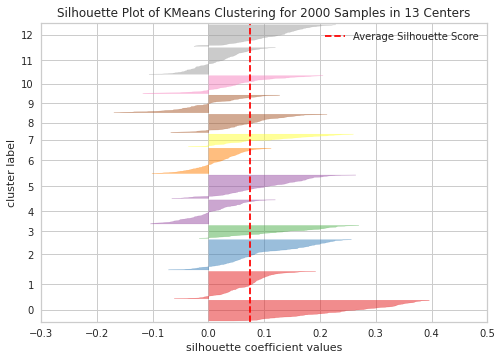

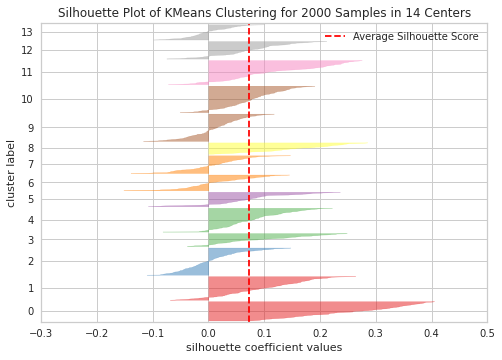

In [16]:
wcss = []                                                                     # Set an empty list to store the silhouette data to
centers = {}                                                                  # Choose the max amount of silhouettes to be shown on the graph
max_clusters = 15                                                             # Set the highest amount of clusters to be graphed as silhouettes

for number_of_clusters in range(2, max_clusters):                             # Set the range to the amount clusters stated before and the smallest amount of clusters the data can produce.
    kmeans_model = KMeans(n_clusters = number_of_clusters, random_state = 42) # Create the silhouette graphs based on the range
    kmeans_model.fit(mnist_training)                                          # Arrange the data to be readable in a limited graphical format
    centers[str(number_of_clusters)] = kmeans_model.cluster_centers_          # Arrange the amount clusters to be relevant to fit how many centers are displayed
    wcss.append(kmeans_model.inertia_)                                        # Add a new silhouette graph from the minimum number until the maximum amount of clusters is met.
    
    #cluster_labels = kmeans_model.fit_predict(mnist_training)
    
    #silhouette_avg = silhouette_score(mnist_training, cluster_labels)
    #print(
    #    "For n_clusters =", 
    #    number_of_clusters, 
    #    "The average silhouette_score is: ", 
    #    silhouette_avg,)
    
    visualizer = SilhouetteVisualizer(kmeans_model, color='yellowbrick')      # Define the graphs to display under the colors yellow brick assigns
    visualizer.fit(mnist_training)                                            # Arrange the mnist training data to be compatible with the silhouette graphing structure
    visualizer.show()                                                         # Display the final result

ValueError: x and y must be the same size

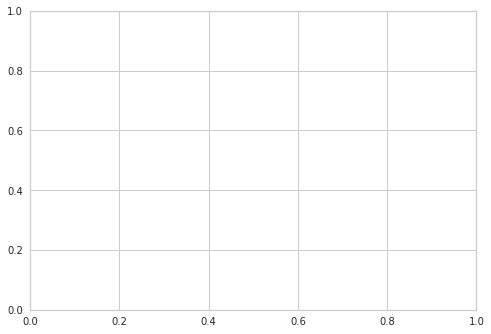

In [15]:
c = np.arange(max_clusters)
plt.scatter(c,wcss)
plt.show()

In [14]:
cluster_labels = clusterer.fit_predict(X)

sample_silhouette_values = silhouette_samples(X, cluster_labels)

NameError: name 'clusterer' is not defined

## **Revision**
---

In [ ]:
np.shape(mnist_training)

In [ ]:
var = []
i = 1
num_clusters = 20

while i <= num_clusters:
    model = KMeans(n_clusters = i, random_state=0)
    model.fit(mnist_training)
    var.append(model.inertia_)
    
    i += 1

In [ ]:
var

In [ ]:
x_clusters_axis = np.arange(num_clusters)
plt.scatter(x_clusters_axis, var)
plt.show

In [ ]:
np.shape(mnist_testing)

In [ ]:
var2 = []
i = 1
num_clusters = 20

while i <= num_clusters:
    model = KMeans(i, random_state=0)
    model.fit(mnist_testing)
    var.append(model.inertia_)
    
    i += 1

In [ ]:
var2

In [ ]:
x_clusters_axis = np.arange(num_clusters2)
plt.scatter(x_clusters_axis, var2)
plt.show

In [ ]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.datasets import load_nfl

# Load a clustering dataset
X, y = load_nfl()

# Specify the features to use for clustering
features = ['Rec', 'Yds', 'TD', 'Fmb', 'Ctch_Rate']
X = X.query('Tgt >= 20')[features]

# Instantiate the clustering model and visualizer
model = KMeans(5, random_state=42)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure